$$
\frac{d \dot U}{dz} = \dot I \cdot \dot Z_1 
\\
\frac{d \dot I}{dz} = \dot U \cdot \dot Y_1
$$

$$
\dot Z_1 = R_1 + j \omega L_1 \quad
\dot Z_1 = R_1 + j X_{L_1}
\\
\dot Y_1 = G_1 + j \omega C_1 \quad
\dot Y_1 = G_1 + j X_{C_1}
$$

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Параметры линии в системе СИ
r = 0.001 # Радиус провода в м
d = 0.02 # Расстояние между проводами в м
eps = 1
lmbd = 0.600 # в м
f = 3e8 / lmbd # в ГЦ

# Погонные параметры
C1 = 12.1 * eps * np.log10(d/r) # пФ/м
L1 = 0.92 * np.log10(d/r) # мкГн/м
R1 = 1.44 / ((r*1000)*np.sqrt(lmbd)) # Ом/м
# R1 = 1. # Ом/м
G1 = 0
W = (276 / np.sqrt(eps)) * np.log10(d/r) # Ом

def Z1(z):
  return R1 + 1j * (2 * np.pi * f) * L1 * 10**(-6)

def Y1(z):
  return G1 + 1j * (2 * np.pi * f) * C1 * 10**(-12)

In [54]:
# Метод Рунге-Кутта 4 порядка

def frange(start, stop, step):
  while start < stop:
    yield float(start)
    start += step

def Compute(df, x_max, dx, y_start = 0, x_min = 0):
  y = y_start
  res_x = [x_min]
  res_y = [y_start]
  for x in frange(x_min, x_max, dx):
    k1 = df(x,        y)
    k2 = df(x + dx/2, y + dx * k1/2)
    k3 = df(x + dx/2, y + dx * k2/2)
    k4 = df(x + dx,   y + dx * k3)  
    y += (k1 + 2*k2 + 2*k3 + k4) * dx / 6
    res_x.append(x+dx)
    res_y.append(y.copy())
  return (res_x, res_y)

In [55]:
# Телеграфные уравнения
def TelegrafEq(z, UI):
  return np.array([
                   UI[1]*Z1(z),
                   UI[0]*Y1(z)
  ])

In [56]:
Res = Compute(TelegrafEq, 1*lmbd, 0.001, [1., 0.])

z = Res[0]
UI = np.array(Res[1])
U = UI.transpose()[0]
I = UI.transpose()[1]
Zin = U/I

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


(-1149.0696921704282, 1149.0696921704282)

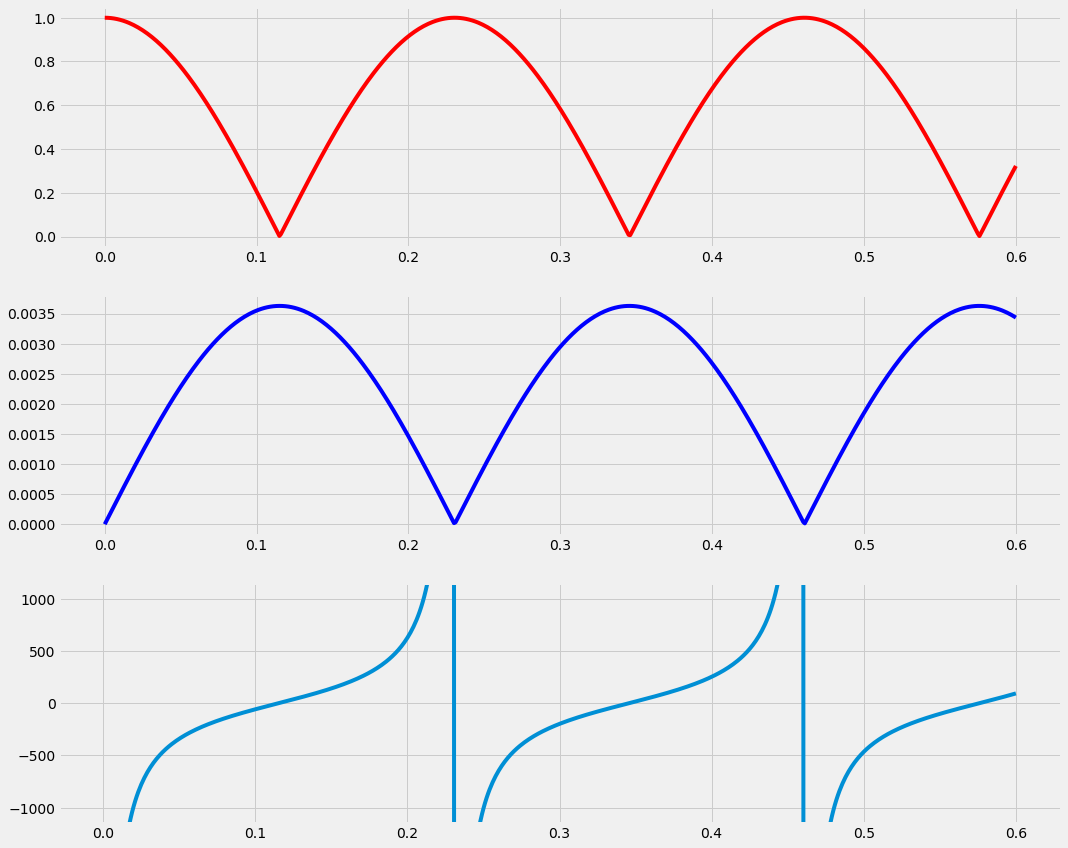

In [61]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(3, 1, figsize=(16, 14))
ax[0].plot(z, abs(U), 'r')
ax[1].plot(z, abs(I), 'b')
ax[2].plot(z, np.imag(Zin))
ax[2].set_ylim(ymin=-3.2*W, ymax=3.2*W)